In [1]:
# Importing all the necessary basic libraries.,
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the train data

In [2]:
oo = pd.read_csv("/kaggle/input/loan-dataset/train_1.csv")
oo.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
oo.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
oo.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
oo.drop('Loan_ID',axis=1,inplace=True)
oo.head()
#dropping loan id as it has only unique values

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
oo.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

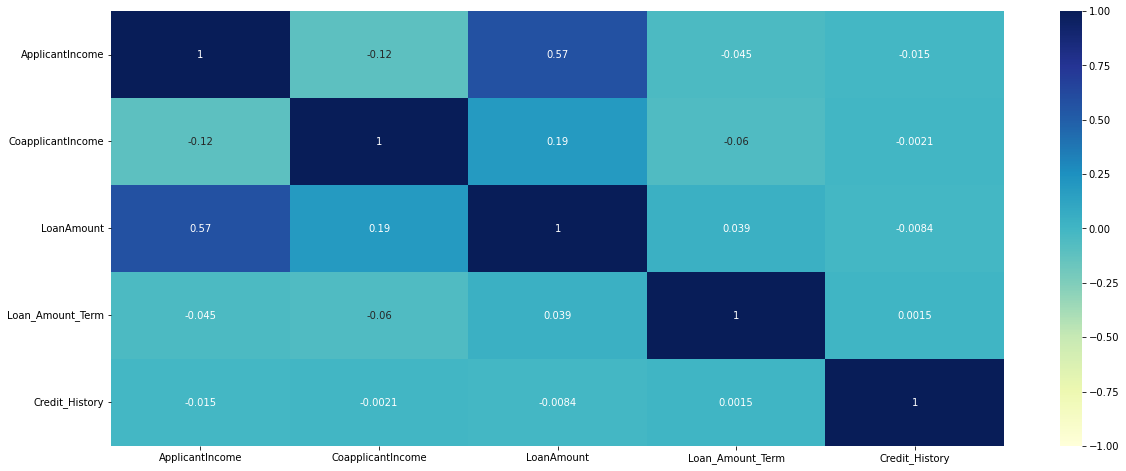

In [8]:
corrmatrix = oo.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-1,vmax=1,cmap = 'YlGnBu')

In [9]:
#no much ocrrelation to avoid data

In [10]:
Y = oo.Loan_Status
X = oo.drop('Loan_Status',axis=1)

### Missing Values Handling

In [11]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [13]:
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [14]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
# lets start with categorical cols. since categorical we should use mode
X.Gender.mode()[0]
X.Married.mode()[0]
X.Dependents.mode()[0]
X.Self_Employed.mode()[0]

'No'

In [16]:
for a in ['Gender']:
    X[a] = X[a].fillna(X.Gender.mode()[0])

for e in['Married']:
    X[e] = X[e].fillna(X.Married.mode()[0])

for c in ['Dependents']:
   X[c] = X[c].fillna(X.Dependents.mode()[0])

for d in ['Self_Employed']:
   X[d] = X[d].fillna(X.Self_Employed.mode()[0])

In [17]:
X.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [18]:
freqgraph=X.select_dtypes(include=['float','int'])
freqgraph

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


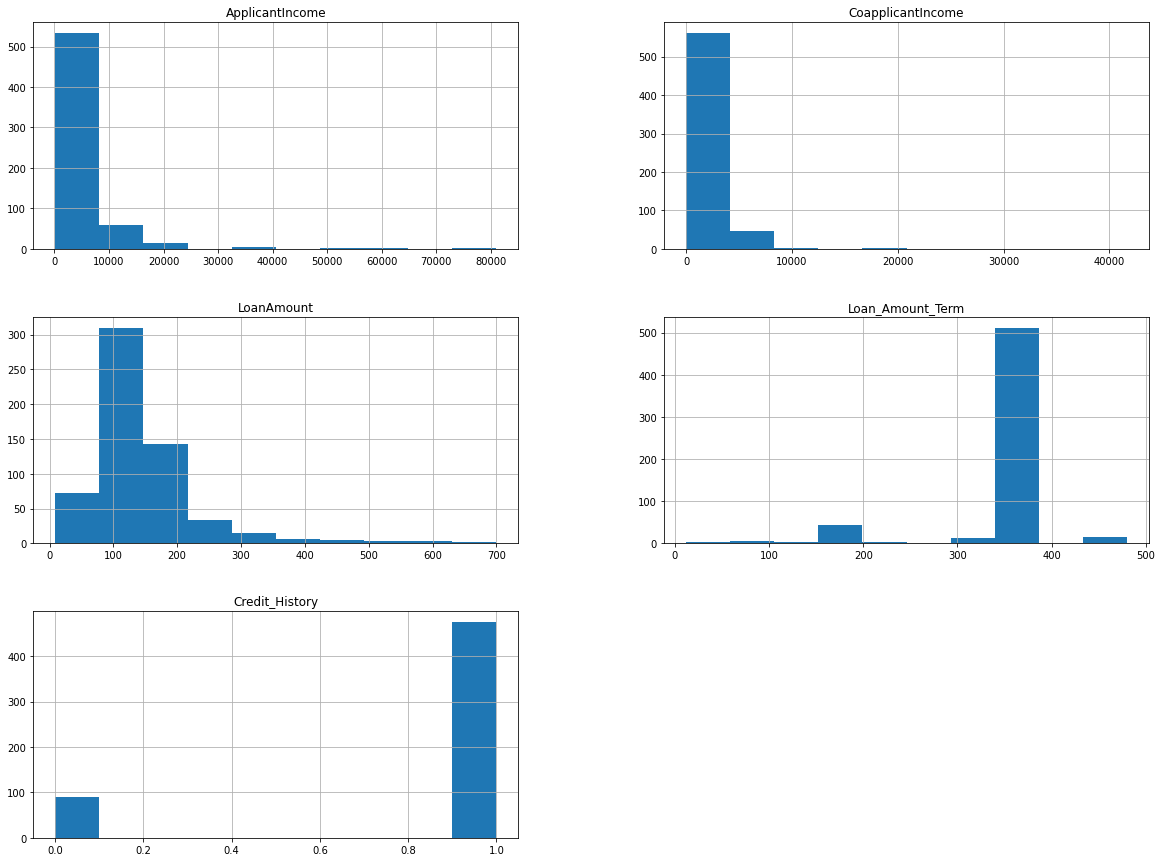

In [19]:
freqgraph.hist(figsize=(20,15));

In [20]:
X.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
dtype: int64

In [21]:
#we wil aply median for loan amount and mode for other two
X.LoanAmount.median()
X.Loan_Amount_Term.mode()[0]
X.Credit_History.mode()[0]

1.0

In [22]:
for a in ['LoanAmount']:
    X[a] = X[a].fillna(X.LoanAmount.median())

for e in['Loan_Amount_Term']:
    X[e] = X[e].fillna(X.Loan_Amount_Term.mode()[0])

for c in ['Credit_History']:
   X[c] = X[c].fillna(X.Credit_History.mode()[0])

In [23]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [87]:
oo1 = pd.read_csv("/kaggle/input/loan-dataset/test_1.csv")
oo1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [88]:
oo1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [89]:
oo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [90]:
#filling missing values of oo1 dataset
oo1.Self_Employed.mode()[0]
oo1.Dependents.mode()[0]
oo1.Gender.mode()[0]
oo1.Credit_History.mode()[0]

1.0

In [92]:
for a in ['Self_Employed']:
    oo1[a] = oo1[a].fillna(oo1.Self_Employed.mode()[0])

for e in['Dependents']:
    oo1[e] = oo1[e].fillna(oo1.Dependents.mode()[0])

for c in ['Gender']:
   oo1[c] = oo1[c].fillna(oo1.Gender.mode()[0])

for c in ['Credit_History']:
   oo1[c] = oo1[c].fillna(oo1.Credit_History.mode()[0])

In [93]:
oo1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [94]:
for a in ['LoanAmount']:
    oo1[a] = oo1[a].fillna(oo1.LoanAmount.median())

for e in['Loan_Amount_Term']:
    oo1[e] = oo1[e].fillna(oo1.Loan_Amount_Term.mode()[0])

In [95]:
oo1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
#missing values corrected in both dataset

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [34]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
X_ss = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
X_ss1 = X[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']]

In [36]:
#min max scaling done
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_ss = stdsclr.fit_transform(X_ss)
X_ss = pd.DataFrame(X_ss, columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
X_ss.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00
25%,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01
50%,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01
75%,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01
max,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01


In [37]:
#one hot encoding done
X_ss1 = pd.get_dummies(X_ss1)
X_ss1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [38]:
#concatenation
X_ss = pd.concat([X_ss1,X_ss],axis=1)
X_ss

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.072991,-0.554487,-0.211241,0.273231,0.411733
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,-0.462062,0.251980,-0.306435,0.273231,0.411733
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.097728,-0.554487,-0.056551,0.273231,0.411733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.410130,-0.554487,-0.889500,0.273231,0.411733
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,-0.212557,-0.554487,-1.258378,-2.522836,0.411733
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0.437174,-0.472404,1.276168,0.273231,0.411733
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.357064,-0.554487,0.490816,0.273231,0.411733


### Splitting the dataset

In [39]:
#x & Y are avaiable so lets split
# Y = oo[['Loan_Status']]
# Y['Loan_Status'].replace(0, 'N',inplace=True) 
# Y['Loan_Status'].replace(1, 'Y',inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ss,Y,test_size=0.25, random_state = 42)
#if test size is 0.25 then total wud be 100, if it is 0.2 then total wud be 80 as 4 sets are made so multiply by 4

[[21 33]
 [ 2 98]]
0.7727272727272727
0.7480916030534351
0.98
0.8484848484848484
              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

roc_auc_score for Log Reg:  0.7394444444444445


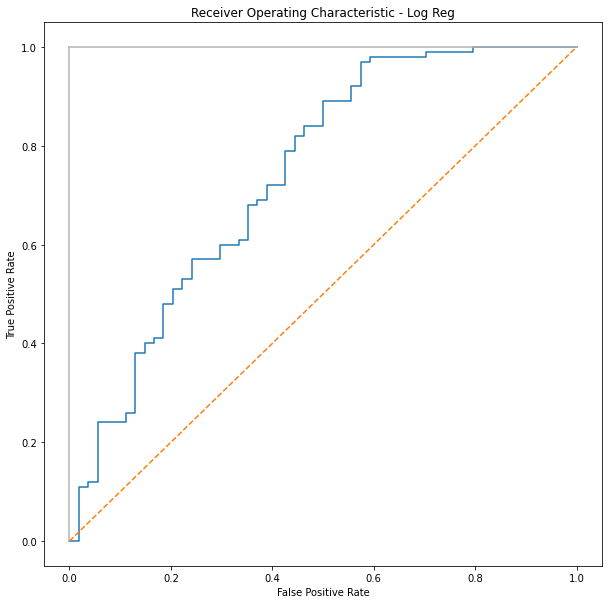

In [40]:
#log regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# solver='lbfgs',max_iter=10000
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print(confusion_matrix(Y_test,Y_pred_logreg))
print(accuracy_score(Y_test,Y_pred_logreg))
print(precision_score(Y_test,Y_pred_logreg, pos_label="Y"))
print(recall_score(Y_test,Y_pred_logreg, pos_label="Y"))
print(f1_score(Y_test,Y_pred_logreg, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_logreg)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = model1.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score for Log Reg: ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Log Reg')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

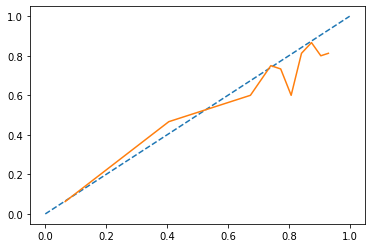

In [41]:
#probability callibration
from sklearn.calibration import calibration_curve
y_means, proba_means = calibration_curve(Y_test, y_score1, n_bins = 10, strategy = "quantile")

#plotting the above strategy
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect calibration')
plt.plot(proba_means, y_means)

roc_auc_score for callibrated Log Reg:  0.7394444444444445
roc_auc_score for Log Reg:  0.7394444444444445


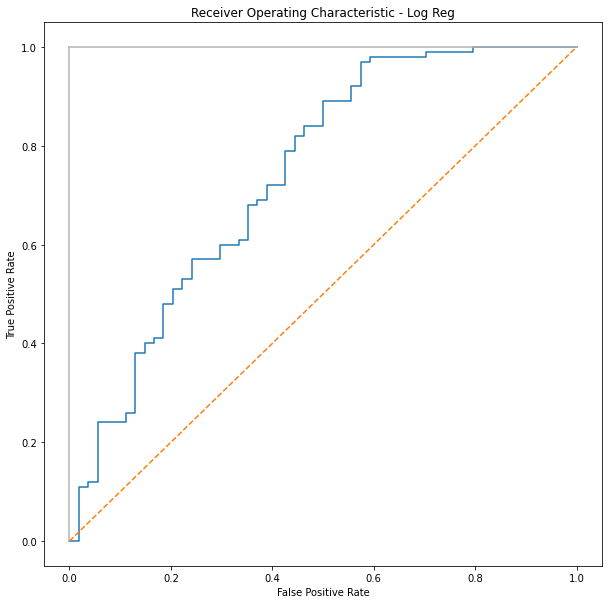

Without callibration, ECE = 0.06537631973145545
Callibrated, ECE =  0.0724095948789064


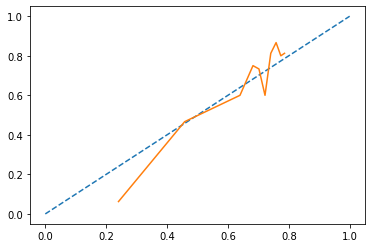

In [42]:
# callibrating using log regression
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression().fit(y_score1.reshape(-1, 1), Y_test)
proba_test_forest_logreg = log_reg1.predict_proba(model1.predict_proba(X_test)[:, 1].reshape(-1, 1))[:, 1]

# comparing the 2 callibration with no callib model using Freedman-Diaconis rule
def expected_calibration_error(y, proba, bins = 'fd'):
  import numpy as np
  bin_count, bin_edges = np.histogram(proba, bins = bins)
  n_bins = len(bin_count)
  bin_edges[0] -= 1e-8 # because left edge is not included
  bin_id = np.digitize(proba, bin_edges, right = True) - 1
  bin_ysum = np.bincount(bin_id, weights = y, minlength = n_bins)
  bin_probasum = np.bincount(bin_id, weights = proba, minlength = n_bins)
  bin_ymean = np.divide(bin_ysum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  bin_probamean = np.divide(bin_probasum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  ece = np.abs((bin_probamean - bin_ymean) * bin_count).sum() / len(proba)
  return ece

Y_testa = pd.DataFrame(Y_test)
Y_testa['Loan_Status'].replace('N',0 ,inplace=True) 
Y_testa['Loan_Status'].replace('Y',1 ,inplace=True)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, proba_test_forest_logreg, pos_label="Y")
print('roc_auc_score for callibrated Log Reg: ', roc_auc_score(Y_test, proba_test_forest_logreg))
print('roc_auc_score for Log Reg: ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Log Reg')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# probability callibration
from sklearn.calibration import calibration_curve
y_means, proba_means = calibration_curve(Y_test, proba_test_forest_logreg, n_bins = 10, strategy = "quantile")

#plotting the above strategy
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect calibration')
plt.plot(proba_means, y_means)

print("Without callibration, ECE =",expected_calibration_error(np.ravel(Y_testa), y_score1))
print("Callibrated, ECE = ",expected_calibration_error(np.ravel(Y_testa), proba_test_forest_logreg))

[[24 30]
 [ 3 97]]
0.7857142857142857
0.7637795275590551
0.97
0.8546255506607929
              precision    recall  f1-score   support

           N       0.89      0.44      0.59        54
           Y       0.76      0.97      0.85       100

    accuracy                           0.79       154
   macro avg       0.83      0.71      0.72       154
weighted avg       0.81      0.79      0.76       154

roc_auc_score :  0.6748148148148149


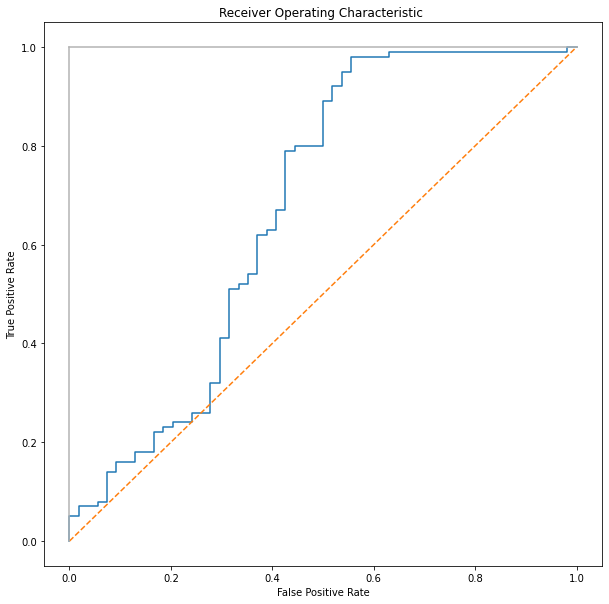

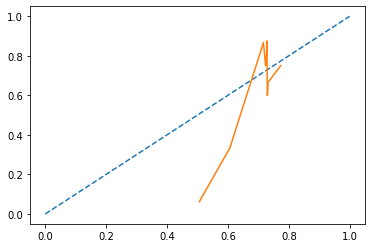

In [43]:
#SVM polynomial
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='poly', degree = 4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmp))
print(accuracy_score(Y_test, y_pred_svmp))
print(precision_score(Y_test,y_pred_svmp, pos_label="Y"))
print(recall_score(Y_test,y_pred_svmp, pos_label="Y"))
print(f1_score(Y_test,y_pred_svmp, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmp)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = svm_clf_p.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#probability callibration
from sklearn.calibration import calibration_curve
y_means, proba_means = calibration_curve(Y_test, y_score1, n_bins = 10, strategy = "quantile")

#plotting the above strategy
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect calibration')
plt.plot(proba_means, y_means)

[[24 30]
 [ 3 97]]
0.7857142857142857
0.7637795275590551
0.97
0.8546255506607929
              precision    recall  f1-score   support

           N       0.89      0.44      0.59        54
           Y       0.76      0.97      0.85       100

    accuracy                           0.79       154
   macro avg       0.83      0.71      0.72       154
weighted avg       0.81      0.79      0.76       154

roc_auc_score of uncalibrated:  0.6748148148148149


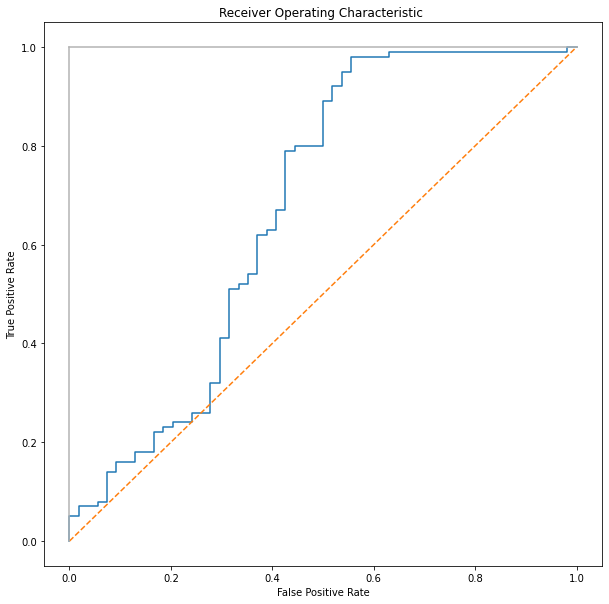

[[22 32]
 [ 1 99]]
0.7857142857142857
0.7557251908396947
0.99
0.8571428571428572
              precision    recall  f1-score   support

           N       0.96      0.41      0.57        54
           Y       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154

roc_auc_score of calibrated :  0.7418518518518519


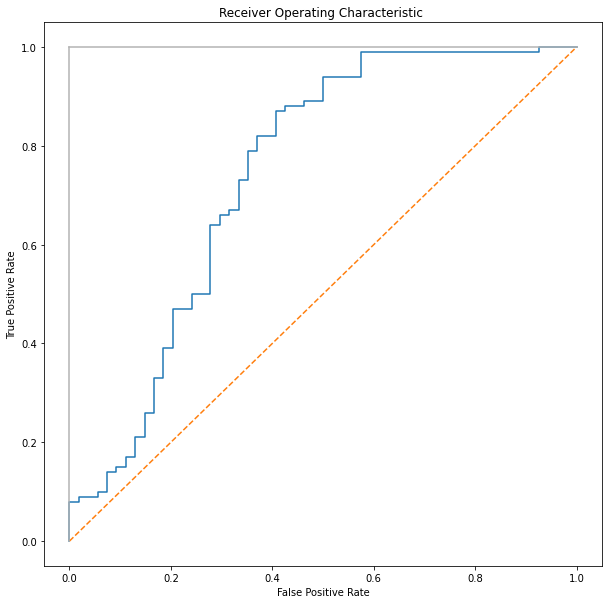

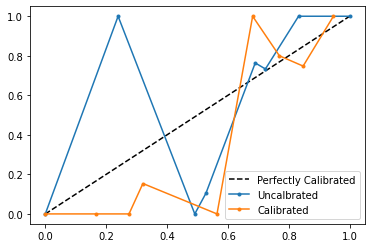

Without callibration, ECE = 0.18639798413837738
Callibrated, ECE =  0.15308387686991398


In [44]:
from sklearn.calibration import CalibratedClassifierCV
from matplotlib import pyplot

# predict uncalibrated probabilities
def uncalibrated(X_train, X_test, Y_train):
#  fit a model
 svm_clf_p = SVC(kernel='poly', degree = 4, probability=True)
 svm_model = svm_clf_p.fit(X_train, Y_train)
 y_pred_svmp = svm_clf_p.predict(X_test)
 # predict probabilities
#  return svm_clf_p.decision_function(X_test)
 return svm_clf_p.predict_proba(X_test)[:, 1]

# predict calibrated probabilities
def calibrated(X_train, X_test, Y_train, probability=True):
 # define model
 model = SVC(kernel='poly', degree = 4)
 # define and fit calibration model
 calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
#  calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
 calibrated.fit(X_train, Y_train)
 # predict probabilities
 return calibrated.predict_proba(X_test)[:, 1]

# predict the Y_test
model = SVC()
calibrated1 = CalibratedClassifierCV(model, method='sigmoid', cv=5)
#  calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated1.fit(X_train, Y_train)
y_pred_svmp1 = calibrated1.predict(X_test)

# metrics
print(confusion_matrix(Y_test, y_pred_svmp))
print(accuracy_score(Y_test, y_pred_svmp))
print(precision_score(Y_test,y_pred_svmp, pos_label="Y"))
print(recall_score(Y_test,y_pred_svmp, pos_label="Y"))
print(f1_score(Y_test,y_pred_svmp, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmp)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = svm_clf_p.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score of uncalibrated: ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# metrics
print(confusion_matrix(Y_test, y_pred_svmp1))
print(accuracy_score(Y_test, y_pred_svmp1))
print(precision_score(Y_test,y_pred_svmp1, pos_label="Y"))
print(recall_score(Y_test,y_pred_svmp1, pos_label="Y"))
print(f1_score(Y_test,y_pred_svmp1, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmp1)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1a = calibrated1.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1a, pos_label="Y")
print('roc_auc_score of calibrated : ', roc_auc_score(Y_test, y_score1a))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#create binary 2class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# uncalibrated predictions
yhat_uncalibrated = uncalibrated(X_train, X_test, Y_train)

# calibrated predictions
yhat_calibrated = calibrated(X_train, X_test, Y_train)

# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(Y_test, yhat_uncalibrated, n_bins=10,normalize=True )
fop_calibrated, mpv_calibrated = calibration_curve(Y_test, yhat_calibrated, n_bins=10,normalize=True)

# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.')
pyplot.legend(["Perfectly Calibrated","Uncalbrated","Calibrated"])
pyplot.show()

print("Without callibration, ECE =",expected_calibration_error(np.ravel(Y_testa), yhat_uncalibrated))
print("Callibrated, ECE = ",expected_calibration_error(np.ravel(Y_testa), yhat_calibrated))

[[22 32]
 [ 1 99]]
0.7857142857142857
0.7557251908396947
0.99
0.8571428571428572
              precision    recall  f1-score   support

           N       0.96      0.41      0.57        54
           Y       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154

roc_auc_score :  0.7316666666666666


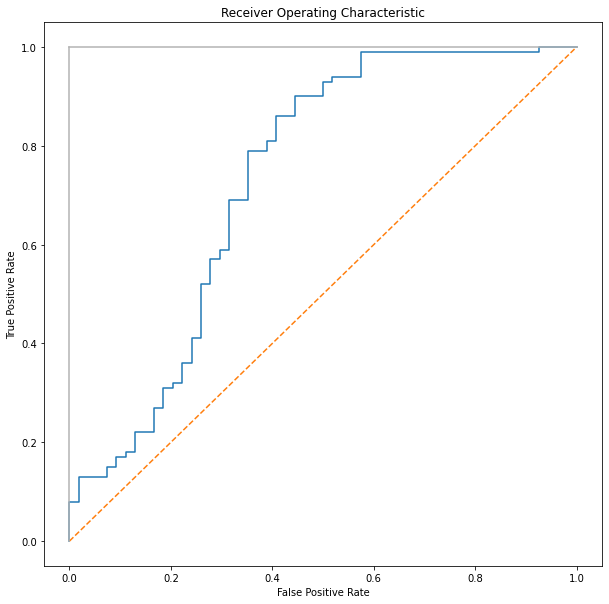

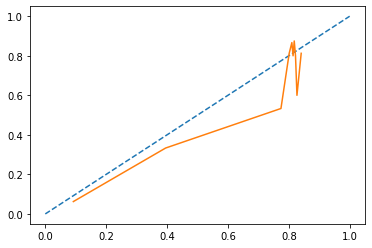

In [45]:
#svm rbf
from sklearn.svm import SVC
svm_clf_r = SVC(kernel='rbf', degree = 4, probability=True)
svm_model = svm_clf_r.fit(X_train, Y_train)
y_pred_svmr = svm_clf_r.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmr))
print(accuracy_score(Y_test, y_pred_svmr))
print(precision_score(Y_test,y_pred_svmr, pos_label="Y"))
print(recall_score(Y_test,y_pred_svmr, pos_label="Y"))
print(f1_score(Y_test,y_pred_svmr, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmr)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = svm_clf_r.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#probability callibration
from sklearn.calibration import calibration_curve
y_means, proba_means = calibration_curve(Y_test, y_score1, n_bins = 10, strategy = "quantile")

#plotting the above strategy
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect calibration')
plt.plot(proba_means, y_means)

[[22 32]
 [ 1 99]]
0.7857142857142857
0.7557251908396947
0.99
0.8571428571428572
              precision    recall  f1-score   support

           N       0.96      0.41      0.57        54
           Y       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154

roc_auc_score :  0.7316666666666666


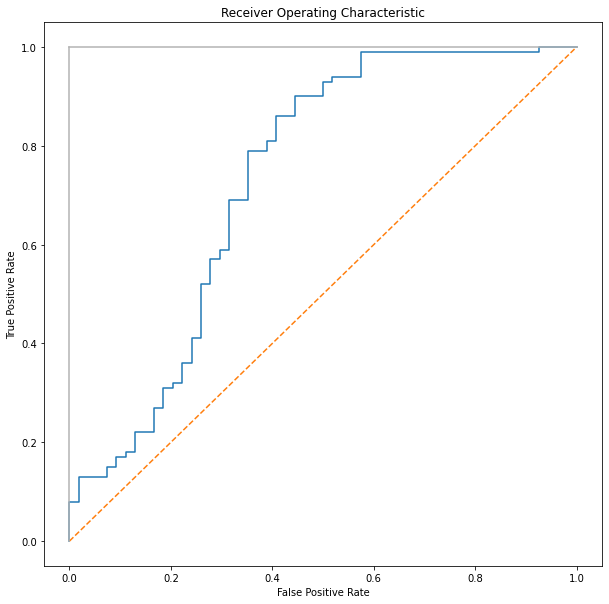

[[22 32]
 [ 1 99]]
0.7857142857142857
0.7557251908396947
0.99
0.8571428571428572
              precision    recall  f1-score   support

           N       0.96      0.41      0.57        54
           Y       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154

roc_auc_score of calibrated :  0.7418518518518519


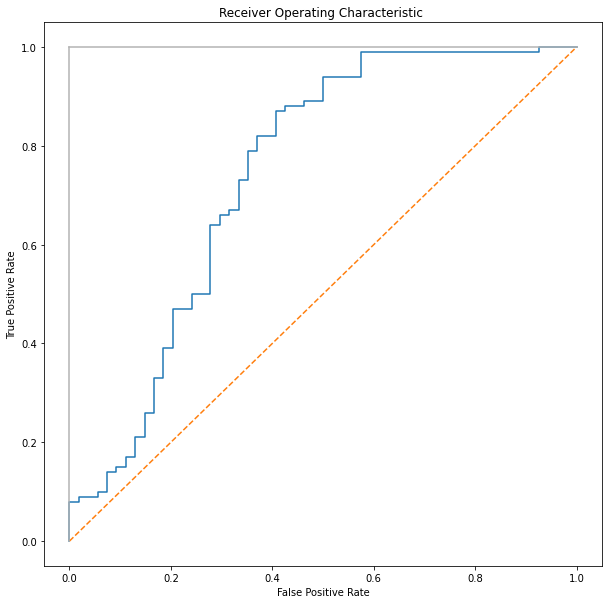

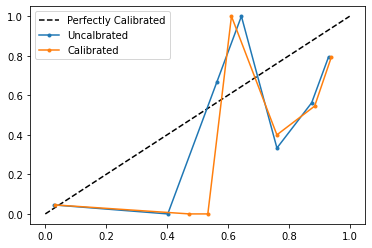

Without callibration, ECE = 0.09544783434877144
Callibrated, ECE =  0.10385528647621488


In [46]:
from sklearn.calibration import CalibratedClassifierCV
from matplotlib import pyplot

# predict uncalibrated probabilities for rbf
def uncalibrated(X_train, X_test, Y_train):
#  fit a rbf model
 svm_clf_r = SVC(kernel='rbf', degree = 4, probability=True)
 svm_model = svm_clf_r.fit(X_train, Y_train)
 y_pred_svmp = svm_clf_r.predict(X_test)
 # predict probabilities
 return svm_clf_r.predict_proba(X_test)[:, 1]

# metrics
print(confusion_matrix(Y_test, y_pred_svmr))
print(accuracy_score(Y_test, y_pred_svmr))
print(precision_score(Y_test,y_pred_svmr, pos_label="Y"))
print(recall_score(Y_test,y_pred_svmr, pos_label="Y"))
print(f1_score(Y_test,y_pred_svmr, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmr)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = svm_clf_r.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# predict calibrated probabilities
def calibrated(X_train, X_test, Y_train):
 # define model
 model = SVC(kernel='rbf', degree = 4, probability=True)
 # define and fit calibration model
 calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
#  calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
 calibrated.fit(X_train, Y_train)
 # predict probabilities
 return calibrated.predict_proba(X_test)[:, 1]

# predict the Y_test
model = SVC(kernel='rbf', degree = 4, probability=True)
calibrated1 = CalibratedClassifierCV(model, method='sigmoid', cv=5)
# calibrated1 = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated1.fit(X_train, Y_train)
y_pred_svmr1 = calibrated1.predict(X_test)

# metrics
print(confusion_matrix(Y_test, y_pred_svmr1))
print(accuracy_score(Y_test, y_pred_svmr1))
print(precision_score(Y_test,y_pred_svmr1, pos_label="Y"))
print(recall_score(Y_test,y_pred_svmr1, pos_label="Y"))
print(f1_score(Y_test,y_pred_svmr1, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmr1)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1a = calibrated1.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1a, pos_label="Y")
print('roc_auc_score of calibrated : ', roc_auc_score(Y_test, y_score1a))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# uncalibrated predictions
yhat_uncalibrated = uncalibrated(X_train, X_test, Y_train)

# calibrated predictions
yhat_calibrated = calibrated(X_train, X_test, Y_train)

# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(Y_test, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(Y_test, yhat_calibrated, n_bins=10,normalize=True)

# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.')
pyplot.legend(["Perfectly Calibrated","Uncalbrated","Calibrated"])
pyplot.show()

print("Without callibration, ECE =",expected_calibration_error(np.ravel(Y_testa), yhat_uncalibrated))
print("Callibrated, ECE = ",expected_calibration_error(np.ravel(Y_testa), yhat_calibrated))

[[26 28]
 [21 79]]
0.6818181818181818
0.7383177570093458
0.79
0.7632850241545893
              precision    recall  f1-score   support

           N       0.55      0.48      0.51        54
           Y       0.74      0.79      0.76       100

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154

roc_auc_score :  0.6357407407407407


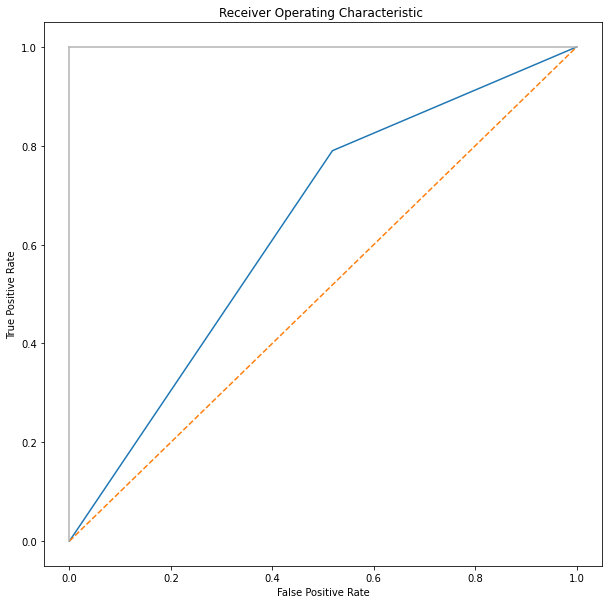

In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, Y_train)
y_pred_dtm = dtm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_dtm))
print(accuracy_score(Y_test, y_pred_dtm))
print(precision_score(Y_test,y_pred_dtm, pos_label="Y"))
print(recall_score(Y_test,y_pred_dtm, pos_label="Y"))
print(f1_score(Y_test,y_pred_dtm, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_dtm)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = dtm_clf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

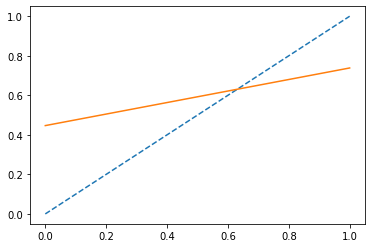

In [48]:
#probability callibration
from sklearn.calibration import calibration_curve
y_means, proba_means = calibration_curve(Y_test, y_score1, n_bins = 10, strategy = "quantile")

#plotting the above strategy
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect calibration')
plt.plot(proba_means, y_means)

[[24 30]
 [ 4 96]]
0.7792207792207793
0.7619047619047619
0.96
0.8495575221238937
              precision    recall  f1-score   support

           N       0.86      0.44      0.59        54
           Y       0.76      0.96      0.85       100

    accuracy                           0.78       154
   macro avg       0.81      0.70      0.72       154
weighted avg       0.80      0.78      0.76       154

roc_auc_score :  0.8009259259259259


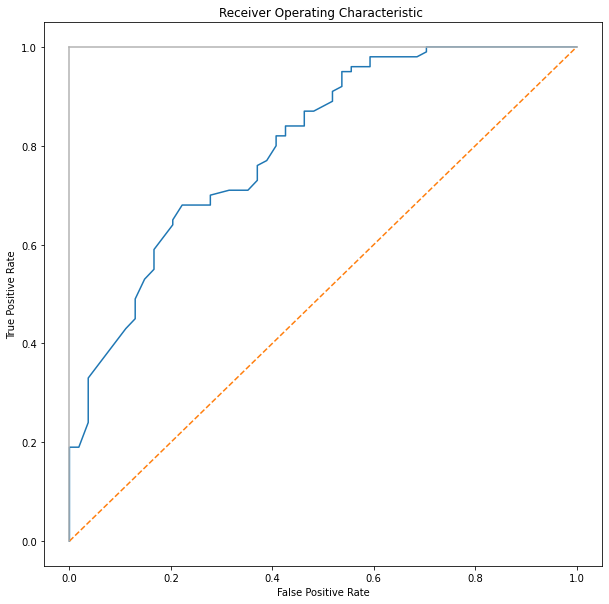

In [78]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))
print(precision_score(Y_test,y_pred_rfm, pos_label="Y"))
print(recall_score(Y_test,y_pred_rfm, pos_label="Y"))
print(f1_score(Y_test,y_pred_rfm, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = rfm_clf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
#tuning
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rfm_clf.get_params())

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [57]:
# We will try adjusting the following set of hyperparameters:

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[[21 33]
 [ 2 98]]
0.7727272727272727
0.7480916030534351
0.98
0.8484848484848484
              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

roc_auc_score :  0.7859259259259259


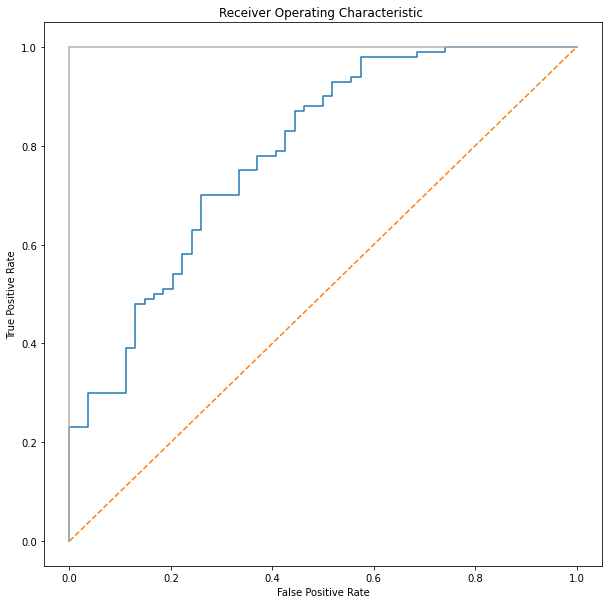

In [77]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=True, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
y_pred_rfm1 = rf_random.predict(X_test)

# metrics
print(confusion_matrix(Y_test, y_pred_rfm1))
print(accuracy_score(Y_test, y_pred_rfm1))
print(precision_score(Y_test,y_pred_rfm1, pos_label="Y"))
print(recall_score(Y_test,y_pred_rfm1, pos_label="Y"))
print(f1_score(Y_test,y_pred_rfm1, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm1)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = rf_random.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### The tuned model is performing less efficient as compared to the original model.

In [76]:
rf_random.best_params_

{'n_estimators': 173,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

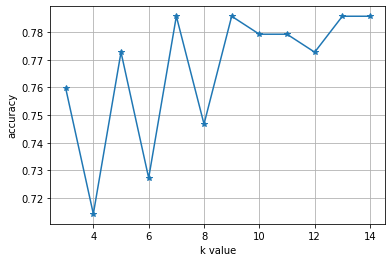

In [53]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(X_train, Y_train)
        Y_pred_knn = model2.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred_knn)
        metric_k.append(acc)
        
plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

[[22 32]
 [ 1 99]]
0.7857142857142857
0.7557251908396947
0.99
0.8571428571428572
              precision    recall  f1-score   support

           N       0.96      0.41      0.57        54
           Y       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154

roc_auc_score :  0.7413888888888889


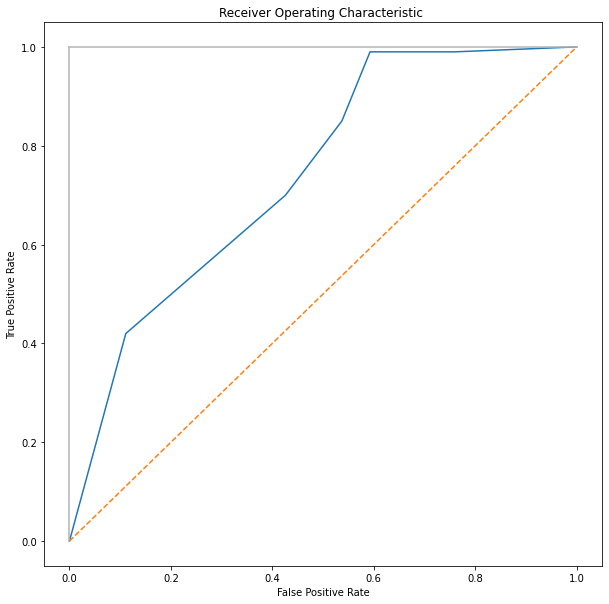

In [54]:
knn = KNeighborsClassifier(n_neighbors=7)
model2 = knn.fit(X_train, Y_train)
Y_pred_knn = model2.predict(X_test)
# metrics
print(confusion_matrix(Y_test,Y_pred_knn))
print(accuracy_score(Y_test,Y_pred_knn))
print(precision_score(Y_test,Y_pred_knn, pos_label="Y"))
print(recall_score(Y_test,Y_pred_knn, pos_label="Y"))
print(f1_score(Y_test,Y_pred_knn, pos_label="Y"))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_knn)
print(report)

#AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_score1 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1, pos_label="Y")
print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))

#ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

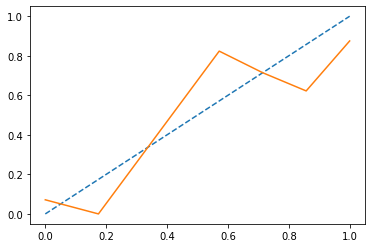

In [55]:
#probability callibration
from sklearn.calibration import calibration_curve
y_means, proba_means = calibration_curve(Y_test, y_score1, n_bins = 10, strategy = "quantile")

#plotting the above strategy
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect calibration')
plt.plot(proba_means, y_means)

### Comparing all the models, Random forest Classifier performs best. Using the same model, test_labels are preicted and submission file is generated

In [96]:
test=oo1.drop('Loan_ID',axis=1)

In [97]:
test=pd.get_dummies(test)
pred_test = rfm_clf.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [98]:
submission=pd.read_csv("/kaggle/input/submission/sample_submission.csv")

In [102]:
submission['Loan_Status']=pred_test

In [104]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('solution1.csv')